In [250]:
import sys, time
import os #os.chdir("dir with *.m files")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
from pyentropy import DiscreteSystem
import scipy.stats as stats

In [251]:
import spikeextractors as se
import kachery as ka
ka.set_config(fr='default_readonly')

In [252]:
#this should be updated 
SF = ka.load_object('sha1://1667383039f1170256e4e3445d46eff367e202e5/output.json', fr='default_readonly')
sorting_results = SF['SortingResults']

In [40]:
sorting_results[1]['comparisonWithTruth']['json']

'sha1://db2148456f557f500d4f5870feabfb3c85f027af/db2148456f557f500d4f5870feabfb3c85f027af'

In [41]:
GT = ka.load_object(sorting_results[0]['comparisonWithTruth']['json'],fr='default_readonly') 
#? when printed, GT is none

In [8]:
def calculate_entropies(sorting, method, word_length, sampling_frequency, binSec=0.005):
    output = np.zeros((len(sorting.get_unit_ids())))
    
    sampF = sampling_frequency
    wLen = word_length
    unit_ids = sorting.get_unit_ids()
    fr = np.zeros(len(unit_ids))
    isi = [[] for uid in unit_ids]
    spike_trains = [sorting.get_unit_spike_train(unit_id=uid) for uid in unit_ids]
    maxT = np.max([np.max(st) for st in spike_trains]) / sampling_frequency
    for ii, unit_id in enumerate(unit_ids):
        spk = spike_trains[ii]
        fr[ii] = len(spk)/maxT
        isi[ii] = np.diff(spk)/sampF
        binSize = binSec * sampF 
        bins = np.arange(0, maxT*sampF, binSize)
        spkCount,_ = np.histogram(spk, bins)
        spkCount[spkCount>1] = 1 #digitising spike train
            
        i = 0
        words = None
        while i<len(spkCount)-wLen:
            if words is None:
                words = spkCount[i:i+wLen]
                i += wLen #increase counter by wLen
            else:
                words = np.vstack((words,spkCount[i:i+wLen]))
                i += wLen
        response = np.zeros(words.shape[0]).astype(int)
        xm = np.max(spkCount)+1
        # todo: this line only applies to a subset of the methods
        sys = DiscreteSystem(words.T.astype(int), (wLen,xm), response, (1,1))
        if method == 'plugin':
            sys.calculate_entropies(method='plugin', calc=['HX'])
            output[ii] = sys.H_plugin['HX']
        elif method == 'pt':
            sys.calculate_entropies(method='pt', calc=['HX'])
            output[ii] = sys.H_pt['HX']
        elif method == 'qe':
            sys.calculate_entropies(method='qe', calc=['HX'])
            output[ii] = sys.H_qe['HX']
        elif method == 'CDM':
            output[ii] = eng.entropyCDM(matlab.double(words.tolist()), 0)
    return output, fr, isi

In [286]:
def calculate_entropies_counts(sorting, method, sampling_frequency, binSec=0.3):
    output = np.zeros((len(sorting.get_unit_ids())))
    
    sampF = sampling_frequency
    unit_ids = sorting.get_unit_ids()
    fr = np.zeros(len(unit_ids))
    isi = [[] for uid in unit_ids]
    spike_trains = [sorting.get_unit_spike_train(unit_id=uid) for uid in unit_ids]
    maxT = np.max([np.max(st) for st in spike_trains]) / sampling_frequency
    for ii, unit_id in enumerate(unit_ids):
        spk = spike_trains[ii]
        fr[ii] = len(spk)/maxT
        isi[ii] = np.diff(spk)/sampF
        binSize = binSec * sampF 
        bins = np.arange(0, maxT*sampF, binSize)
        spkCount,_ = np.histogram(spk, bins)
            
        xm = np.max(spkCount)+1
        sys = DiscreteSystem(spkCount.astype(int), (1,xm), spkCount, (1,xm))        
        if method == 'plugin':
            sys.calculate_entropies(method='plugin', calc=['HX'])
            output[ii] = sys.H_plugin['HX']
        elif method == 'pt':
            sys.calculate_entropies(method='pt', calc=['HX'])
            output[ii] = sys.H_pt['HX']
        elif method == 'qe':
            sys.calculate_entropies(method='qe', calc=['HX'])
            output[ii] = sys.H_qe['HX']
        #elif method == 'CDM':
            #output[ii] = eng.entropyCDM(matlab.double(spkCount.tolist()), 0)
    return output, fr, isi

In [287]:
sorting_results = SF['SortingResults']
len(sorting_results[0]),len(sorting_results)
firings_path = ka.load_file(sorting_results[0]['firings'])
sorting = se.MdaSortingExtractor(firings_path)

In [288]:
ii = []
for i in sorting_results:
    ii.append(i['studyName'])
ii = np.array(ii)
for n in np.unique(ii):
    print(n,'\t',sum(ii==n))

LONG_DRIFT_1200s_16c 	 90
LONG_DRIFT_1200s_8c 	 90
LONG_DRIFT_2400s_16c 	 90
LONG_DRIFT_2400s_8c 	 90
LONG_DRIFT_300s_16c 	 90
LONG_DRIFT_300s_8c 	 90
LONG_DRIFT_4800s_16c 	 90
LONG_DRIFT_4800s_8c 	 90
LONG_DRIFT_600s_16c 	 90
LONG_DRIFT_600s_8c 	 90
LONG_STATIC_1200s_16c 	 90
LONG_STATIC_1200s_8c 	 90
LONG_STATIC_2400s_16c 	 90
LONG_STATIC_2400s_8c 	 90
LONG_STATIC_300s_16c 	 90
LONG_STATIC_300s_8c 	 90
LONG_STATIC_4800s_16c 	 90
LONG_STATIC_4800s_8c 	 90
LONG_STATIC_600s_16c 	 90
LONG_STATIC_600s_8c 	 90
hybrid_drift_siprobe 	 168
hybrid_drift_tetrode 	 72
hybrid_static_siprobe 	 168
hybrid_static_tetrode 	 72
manual_tetrode_1200s 	 48
manual_tetrode_2400s 	 24
manual_tetrode_600s 	 96
mea_c30 	 42
neurocube_quiroga_difficult1 	 24
neurocube_quiroga_difficult2 	 24
neurocube_quiroga_easy1 	 24
neurocube_quiroga_easy2 	 24
neurocube_sim2_11K20 	 300
neurocube_sim2_2K10 	 270
paired_boyden32c 	 152
paired_crcns 	 744
paired_english 	 58
paired_kampff 	 120
paired_mea64c 	 162
paired_mo

In [371]:
sorters_ = []; recs = []
ref_study = 'paired_monotrode_mea64c'
for i in sorting_results:
    if i['studyName']==ref_study:
        sorters_.append(i['sorterName'])
        recs.append(i['recordingName'])
sorters_ = np.asarray(sorters_)
sorters = np.unique(sorters_)
recs_names = np.unique(recs)
for n in np.unique(sorters):
    print(n,'\t',sum(sorters_==n))

IronClust 	 25
Klusta 	 25
MountainSort4 	 25
SpykingCircus 	 25
Tridesclous 	 25
Waveclus 	 25


In [270]:
output_sort = {} #dictionary
bias = ['pt'] #list - better
FR = {}; ISI = {}
for y in bias:
    all_methods = {k:{} for k in sorters}
    fr = {k:{} for k in sorters}
    isi = {k:{} for k in sorters}
    for k in sorters:
        all_methods[k] = {kk:[] for kk in recs_names}
        fr[k] = {kk:[] for kk in recs_names}
        isi[k] = {kk:[] for kk in recs_names}
    print(y)
    for x in range(len(sorting_results)):
        if sorting_results[x]['studyName']==ref_study:
            try:
                firings_path = ka.load_file(sorting_results[x]['firings'])
                sort_temp = sorting_results[x]['sorterName']
                rec_temp = sorting_results[x]['recordingName']
                sorting = se.MdaSortingExtractor(firings_path)
                all_methods[sort_temp][rec_temp], fr[sort_temp][rec_temp], isi[sort_temp][rec_temp] =\
                    calculate_entropies(sorting, method=y, word_length=10, sampling_frequency=30000,
                                       binSec=0.005)
            except:
                print('exception: iteration %s'%x)
    output_sort[y]= all_methods
    FR[y] = fr; ISI[y] = isi

pt
exception: iteration 18
exception: iteration 19
exception: iteration 20
exception: iteration 21
exception: iteration 22
exception: iteration 23
exception: iteration 24
exception: iteration 25
exception: iteration 26
exception: iteration 27
exception: iteration 28
exception: iteration 29
exception: iteration 30
exception: iteration 31
exception: iteration 32
exception: iteration 429
exception: iteration 430
exception: iteration 431
exception: iteration 432
exception: iteration 433
exception: iteration 434
exception: iteration 435
exception: iteration 436
exception: iteration 437
exception: iteration 438
exception: iteration 439
exception: iteration 440
exception: iteration 441
exception: iteration 442
exception: iteration 443
exception: iteration 1288
exception: iteration 1289
exception: iteration 1290
exception: iteration 1291
exception: iteration 1292
exception: iteration 1293
exception: iteration 1294
exception: iteration 1295
exception: iteration 1296
exception: iteration 1297
ex

In [372]:
output_sort_c = {} #dictionary
bias = ['pt'] #list - better
FR_c = {}; ISI_c = {}
for y in bias:
    all_methods = {k:{} for k in sorters}
    fr = {k:{} for k in sorters}
    isi = {k:{} for k in sorters}
    for k in sorters:
        all_methods[k] = {kk:[] for kk in recs_names}
        fr[k] = {kk:[] for kk in recs_names}
        isi[k] = {kk:[] for kk in recs_names}
    print(y)
    for x in range(len(sorting_results)):
        if sorting_results[x]['studyName']==ref_study:
            try:
                firings_path = ka.load_file(sorting_results[x]['firings'])
                sort_temp = sorting_results[x]['sorterName']
                rec_temp = sorting_results[x]['recordingName']
                sorting = se.MdaSortingExtractor(firings_path)
                all_methods[sort_temp][rec_temp], fr[sort_temp][rec_temp], isi[sort_temp][rec_temp] =\
                    calculate_entropies_counts(sorting, method=y, sampling_frequency=30000,
                                       binSec=0.3)
            except:
                print('exception: iteration %s'%x)
    output_sort_c[y]= all_methods
    FR_c[y] = fr; ISI_c[y] = isi

pt
Downloaded file (209.3 KiB) in 0.8947029113769531 sec.


/Users/martyna/.local/lib/python3.7/site-packages/pyentropy/systems.py:574: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if (not np.issubdtype(X.dtype, np.int)) \
/Users/martyna/.local/lib/python3.7/site-packages/pyentropy/systems.py:575: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  or (not np.issubdtype(Y.dtype, np.int)):


Downloaded file (623.7 KiB) in 1.1982600688934326 sec.
Downloaded file (373.8 KiB) in 1.0632169246673584 sec.
Downloaded file (271.0 KiB) in 0.906527042388916 sec.
Downloaded file (311.8 KiB) in 0.9305541515350342 sec.
Downloaded file (300.5 KiB) in 0.9017109870910645 sec.
Downloaded file (293.5 KiB) in 0.8764188289642334 sec.
Downloaded file (85.9 KiB) in 0.6179571151733398 sec.
Downloaded file (132.6 KiB) in 0.786940336227417 sec.
Downloaded file (255.6 KiB) in 0.937751054763794 sec.
Downloaded file (219.7 KiB) in 0.9104468822479248 sec.
Downloaded file (113.1 KiB) in 0.7282860279083252 sec.
Downloaded file (155.2 KiB) in 0.7859740257263184 sec.
Downloaded file (281.3 KiB) in 0.9252128601074219 sec.
Downloaded file (279.2 KiB) in 0.8760271072387695 sec.
Downloaded file (336.9 KiB) in 1.0527610778808594 sec.
Downloaded file (685.4 KiB) in 1.2136459350585938 sec.
Downloaded file (655.9 KiB) in 1.200592041015625 sec.
Downloaded file (521.0 KiB) in 1.1006619930267334 sec.
Downloaded file

Downloaded file (251.7 KiB) in 0.9081168174743652 sec.
Downloaded file (236.2 KiB) in 0.8945138454437256 sec.
Downloaded file (178.5 KiB) in 0.7807629108428955 sec.
Downloaded file (276.7 KiB) in 0.9101109504699707 sec.
Downloaded file (271.5 KiB) in 0.9152078628540039 sec.
Downloaded file (82.2 KiB) in 0.5887229442596436 sec.
Downloaded file (181.2 KiB) in 0.7617769241333008 sec.
Downloaded file (235.1 KiB) in 0.9034378528594971 sec.
Downloaded file (219.6 KiB) in 0.9251949787139893 sec.
Downloaded file (136.8 KiB) in 0.7494568824768066 sec.
Downloaded file (95.5 KiB) in 0.7571530342102051 sec.
Downloaded file (124.0 KiB) in 0.7415590286254883 sec.
Downloaded file (167.3 KiB) in 0.741692066192627 sec.
Downloaded file (385.3 KiB) in 1.0396721363067627 sec.
Downloaded file (476.1 KiB) in 1.0712518692016602 sec.
Downloaded file (514.8 KiB) in 1.038036823272705 sec.
Downloaded file (313.6 KiB) in 0.9293241500854492 sec.
Downloaded file (468.7 KiB) in 1.0615060329437256 sec.
Downloaded fil

Downloaded file (347.9 KiB) in 1.0031847953796387 sec.
Downloaded file (284.8 KiB) in 0.9279119968414307 sec.
Downloaded file (259.7 KiB) in 0.9178638458251953 sec.
Downloaded file (234.4 KiB) in 0.9629569053649902 sec.
Downloaded file (83.8 KiB) in 0.6174941062927246 sec.
Downloaded file (123.1 KiB) in 0.7325489521026611 sec.
Downloaded file (277.2 KiB) in 0.9284670352935791 sec.
Downloaded file (173.2 KiB) in 0.7642550468444824 sec.
Downloaded file (129.1 KiB) in 0.7547810077667236 sec.
Downloaded file (179.6 KiB) in 0.7898449897766113 sec.
Downloaded file (299.6 KiB) in 0.918607234954834 sec.
Downloaded file (169.7 KiB) in 0.7633941173553467 sec.
Downloaded file (227.3 KiB) in 0.9250869750976562 sec.
Downloaded file (773.1 KiB) in 1.2537600994110107 sec.
Downloaded file (631.8 KiB) in 1.24891996383667 sec.
Downloaded file (577.8 KiB) in 1.1951148509979248 sec.
Downloaded file (287.7 KiB) in 0.964303731918335 sec.
Downloaded file (368.9 KiB) in 0.9948251247406006 sec.
Downloaded file

Downloaded file (127.7 KiB) in 0.752255916595459 sec.
Downloaded file (229.7 KiB) in 0.9018130302429199 sec.
Downloaded file (140.2 KiB) in 0.7682969570159912 sec.
Downloaded file (162.8 KiB) in 0.7952451705932617 sec.
Downloaded file (197.8 KiB) in 0.7692689895629883 sec.
Downloaded file (23.7 KiB) in 0.4773130416870117 sec.
Downloaded file (59.1 KiB) in 0.6085247993469238 sec.
Downloaded file (149.2 KiB) in 0.7893710136413574 sec.
Downloaded file (98.6 KiB) in 0.7544369697570801 sec.
Downloaded file (56.1 KiB) in 0.6166620254516602 sec.
Downloaded file (87.6 KiB) in 0.6475682258605957 sec.
Downloaded file (120.3 KiB) in 0.7262721061706543 sec.
Downloaded file (79.9 KiB) in 0.6249957084655762 sec.
Downloaded file (126.6 KiB) in 0.7638130187988281 sec.
Downloaded file (301.1 KiB) in 1.2111799716949463 sec.
Downloaded file (323.3 KiB) in 1.1771621704101562 sec.
Downloaded file (258.1 KiB) in 1.0925970077514648 sec.
Downloaded file (54.1 KiB) in 0.6095762252807617 sec.
Downloaded file (9

In [324]:
ISI_c['pt'].keys()

dict_keys(['IronClust', 'JRClust', 'KiloSort', 'KiloSort2', 'Klusta', 'MountainSort4', 'SpykingCircus', 'Tridesclous'])

# single unit 

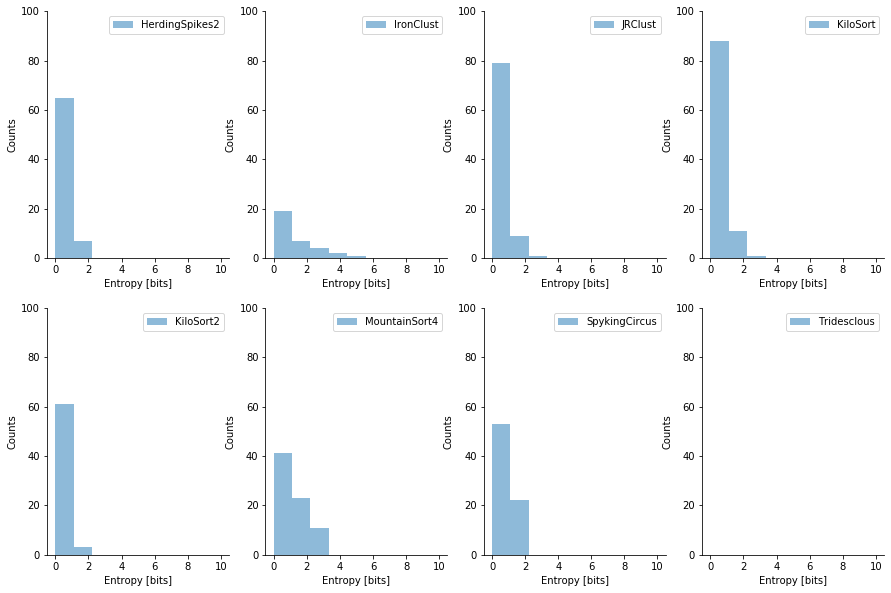

In [73]:
bins = np.linspace(0,10,10)
ri = 2 # rec index
plt.figure(figsize=(15,10))
for n,s in enumerate(sorters):
    plt.subplot(2,4,n+1)
    plt.hist(output_sort_c['pt'][s][recs_names[ri]], bins=bins, label=s, alpha=0.5)
#     print(output['plugin'][s][recs_names[ri]])
    plt.legend()
    sns.despine()
    plt.xlabel('Entropy [bits]')
    plt.ylabel('Counts')
    plt.ylim(0,100)
   # plt.ylim(0,50)

# all units/recording

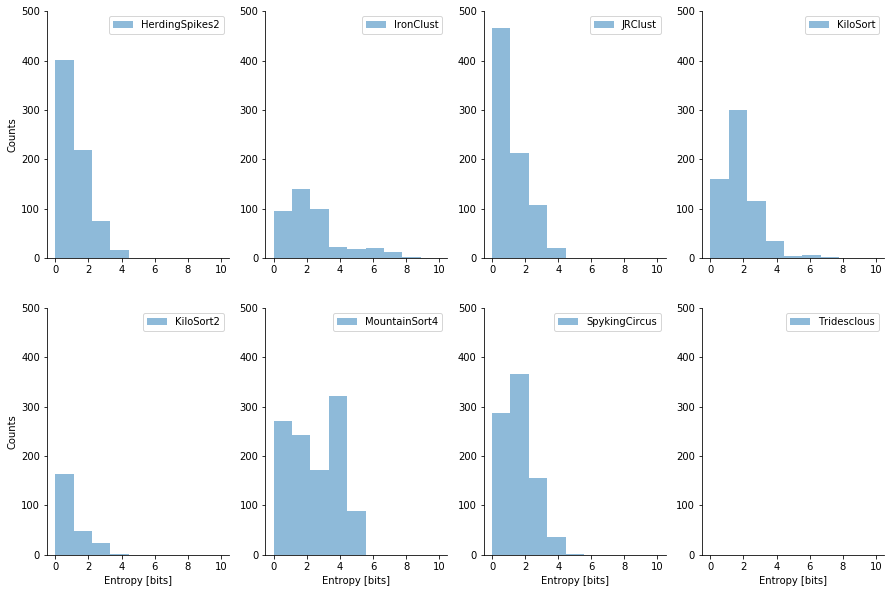

In [273]:
b = 'pt'
toP = {k:[] for k in sorters}
for s in sorters:
    for rr in recs_names:
        toP[s].extend(np.asarray(output_sort_c[b][s][rr]))
        
bins = np.linspace(0,10,10)
ri = 1 # recording index
plt.figure(figsize=(15,10))
for n,s in enumerate(sorters):
    plt.subplot(2,4,n+1)
    plt.hist(toP[s], bins=bins, label=s, alpha=0.5)
    plt.legend()
    sns.despine()
    plt.ylim(0,500)
    if n>3: plt.xlabel('Entropy [bits]')
    if n==0 or n==4: plt.ylabel('Counts')

# entropy vs firing rate & isi

# ground truth (gt) & comparison sorters vs gt

In [325]:
def poisson_spk_entropy(fr,binSec,N):
    x = np.random.poisson(fr*binSec,N)
#     print(fr,np.mean(x)/binSec)
    xm = np.max(x)+1
    sys = DiscreteSystem(x.astype(int), (1,xm), x, (1,xm))
    sys.calculate_entropies(method='pt', calc=['HX'])
    return sys.H_pt['HX']

def run_poisson_spkH_samples(fr,binSec,N,R):
    out = np.zeros(R)
    for r in range(R):
        out[r] = poisson_spk_entropy(fr,binSec,N)
    return np.mean(out)

fr_s = 20
binSec = 0.3
output_ss = []
t = time.time()
for fr_s in [1,5,10,20,50]:
    print(run_poisson_spkH_samples(fr_s,binSec,10000,10))

1.007814635785824
2.224674113627902
2.7850706894328083
3.3135859092338236
3.992559458055541


In [50]:
def calculate_mi_gt(sorting, gt_path, method, sampling_frequency, binSec=0.1):
    output = np.zeros((len(sorting.get_unit_ids())))
    sampF = sampling_frequency
    binSize = binSec * sampF 
    # sorted units loading
    unit_ids = sorting.get_unit_ids()
    spike_trains = [sorting.get_unit_spike_train(unit_id=uid) for uid in unit_ids]
    # gt loading
    path_temp=ka.load_file(gt_path)
    gt_sort = se.MdaSortingExtractor(path_temp)
    unit_ids_gt = gt_sort.get_unit_ids()
    spk_gt = gt_sort.get_units_spike_train(unit_ids_gt)
    maxT = np.max([np.max(st) for st in spike_trains]) / sampling_frequency
    bins = np.arange(0, maxT*sampling_frequency, binSize)
    spkCount_gt,_ = np.histogram(spk_gt, bins)
    ym = np.max(spkCount_gt)+1
    for ii, unit_id in enumerate(unit_ids):
        spk = spike_trains[ii]
        bins = np.arange(0, maxT*sampF, binSize)
        spkCount,_ = np.histogram(spk, bins)
        xm = np.max(spkCount)+1
        # MI calculation
        sys = DiscreteSystem(spkCount.astype(int), (1,xm), spkCount_gt, (1,ym))        
        sys.calculate_entropies_counts(method=method, calc=['HX','HY','HXY'])
        output[ii] = sys.I(); hy = sys.H_pt['HY']
    return [output,hy]

In [51]:
a = []
ref_study_gt = gt_path_kampff.keys()
out_mi = {k:{} for k in sorters}; gt_mi = {}
for x in range(len(sorting_results)):
    if sorting_results[x]['recordingName'] in ref_study_gt:
        try:
            firings_path = ka.load_file(sorting_results[x]['firings'])
            sort_temp = sorting_results[x]['sorterName']
            rec_temp = sorting_results[x]['recordingName']
            a.append(rec_temp)
            sorting = se.MdaSortingExtractor(firings_path)
            out_mi[sort_temp][rec_temp], gt_mi[rec_temp] = calculate_mi_gt(sorting,gt_path_kampff[rec_temp], method='pt', sampling_frequency=30000,
                               binSec=0.05)
        except: pass
print(np.unique(a))

['2015_09_03_Pair_9_0A' '2015_09_03_Pair_9_0B' 'c26' 'c28' 'c45' 'c46']


In [52]:
mi_score = {k:{} for k in sorters}; mi_id = {k:{} for k in sorters}
for s in sorters:
    for r in ref_study_gt:
        try:
            mi_score[s][r] = np.nanmax(out_mi[s][r]) / gt_mi[r]
            mi_id[s][r] = np.argmax(out_mi[s][r])
        except: mi_score[s][r] = np.nan; mi_id[s][r] = np.nan 

In [53]:
pd.DataFrame(mi_score)

NameError: name 'pd' is not defined

HerdingSpikes2 0.9379935268508658 0.6824288136447615
IronClust 0.9443237094226397 0.8617082747771433
JRClust 0.923673444812397 0.8559850479420771
KiloSort 0.9792959925552472 0.8854786489526204
KiloSort2 0.001253295539050194 0.001253295539050194
MountainSort4 0.9413957665580075 0.766700730705376
SpykingCircus 0.9557285497468192 0.7710388084271654
Tridesclous nan nan


/Users/martyna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN axis encountered
  if __name__ == '__main__':
/Users/martyna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Text(0, 0.5, 'Mutual Information [bits]')

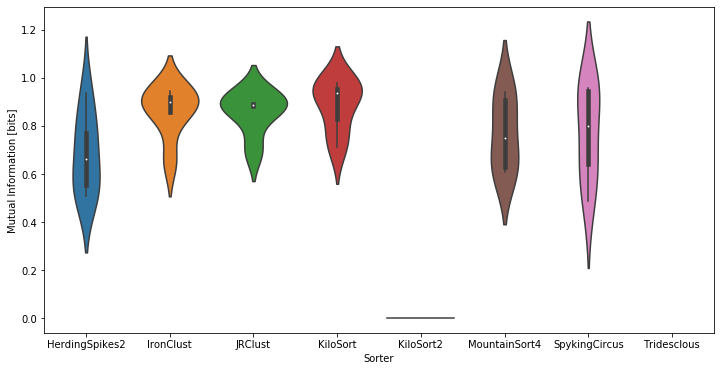

In [78]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame()
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)
for s in sorters:
    temp = [mi_score[s][r] for r in mi_score[s].keys()]
    df[s] = temp
    print(s,np.nanmax(temp), np.nanmean(temp))
sns.violinplot(data=df,ax=ax)
plt.xlabel('Sorter'); plt.ylabel('Mutual Information [bits]')

In [37]:
df

,HerdingSpikes2,IronClust,JRClust,KiloSort,KiloSort2,MountainSort4,SpykingCircus,Tridesclous
0,0.506982,0.655371,0.699438,0.793296,NaN,0.692022,0.487400,NaN
1,0.747931,0.891369,0.890552,0.941241,NaN,0.940496,0.924189,NaN
2,0.579145,0.847248,NaN,0.979296,NaN,0.941396,0.955729,NaN
3,0.777379,0.911073,0.880772,0.959201,NaN,0.810596,0.631451,NaN
4,0.545142,0.920865,0.885490,0.929605,NaN,0.606150,0.677579,NaN
5,0.937994,0.944324,0.923673,0.710233,0.001253,0.609545,0.949885,NaN


In [326]:
gt_path_kampff = {'c26':'sha1dir://51570fce195942dcb9d6228880310e1f4ca1395b.paired_kampff/c26/firings_true.mda',
           'c46':'sha1dir://51570fce195942dcb9d6228880310e1f4ca1395b.paired_kampff/c46/firings_true.mda',
           'c28':'sha1dir://51570fce195942dcb9d6228880310e1f4ca1395b.paired_kampff/c28/firings_true.mda',
            'c45':'sha1dir://51570fce195942dcb9d6228880310e1f4ca1395b.paired_kampff/c45/firings_true.mda',
             '2015_09_03_Pair_9_0A':'sha1dir://51570fce195942dcb9d6228880310e1f4ca1395b.paired_kampff/2015_09_03_Pair_9_0A/firings_true.mda',
             '2015_09_03_Pair_9_0B':'sha1dir://51570fce195942dcb9d6228880310e1f4ca1395b.paired_kampff/2015_09_03_Pair_9_0B/firings_true.mda'}

gt_path_boyden = {'915_10_1':'sha1dir://49b1fe491cbb4e0f90bde9cfc31b64f985870528.paired_boyden32c/915_10_1/firings_true.mda',
           '915_18_1':'sha1dir://49b1fe491cbb4e0f90bde9cfc31b64f985870528.paired_boyden32c/915_18_1/firings_true.mda',
           '915_8_1':'sha1dir://49b1fe491cbb4e0f90bde9cfc31b64f985870528.paired_boyden32c/915_8_1/firings_true.mda',
            '531_2_1':'sha1dir://49b1fe491cbb4e0f90bde9cfc31b64f985870528.paired_boyden32c/531_2_1/firings_true.mda',
             '419_1_7':'sha1dir://49b1fe491cbb4e0f90bde9cfc31b64f985870528.paired_boyden32c/419_1_7/firings_true.mda',
             '419_1_8':'sha1dir://49b1fe491cbb4e0f90bde9cfc31b64f985870528.paired_boyden32c/419_1_8/firings_true.mda'}

gt_path_english = {#'m113_191125_213423':'sha1://249d20297e123fa3dca09e7cda1a78664944ae28/firings_true.json',
           'm15_190315_152315_cell1':'sha1://9f15a4ee3db2d18b6a3b3e0ad632e5d9764cd37f/firings_true.json',
           'm14_190326_160710_cell1':'sha1://b56d170dc6019d81e41f5a171d5f50e677eaed71/firings_true.json',
            'm139_200114_222743':'sha1://b56d170dc6019d81e41f5a171d5f50e677eaed71/firings_true.json'}

best_unitid_kampff = {'c26':8, 'c46':14, 'c28':10, 'c45':13, '2015_09_03_Pair_9_0A':1, '2015_09_03_Pair_9_0B':2}
best_unitid_boyden = {'915_10_1':15, '915_18_1':17, '531_2_1':9, '915_8_1':18, '419_1_7':1, '419_1_8':2}
best_unitid_english = {'m113_191125_213423':3, 'm15_190315_152315_cell1':17, 'm14_190326_160710_cell1':13, 'm139_200114_222743':10}

In [123]:
gt_features = {}
for d in gt_path_kampff.keys():
    gt_features[d] = {}
    path_temp=ka.load_file(gt_path_kampff[d])
    gt_features[d]['sorting'] = se.MdaSortingExtractor(path_temp)
    gt_features[d]['H'], gt_features[d]['FR'], gt_features[d]['ISI'] =\
        calculate_entropies(gt_features[d]['sorting'], method='pt', word_length=10, sampling_frequency=30000,
                                       binSec=0.05)

KeyError: 'm15_190315_152315_cell1'

In [343]:
gt_features_c = {}
for d in gt_path_kampff.keys():
    gt_features_c[d] = {}
    path_temp=ka.load_file(gt_path_kampff[d])
    gt_features_c[d]['sorting'] = se.MdaSortingExtractor(path_temp)
    gt_features_c[d]['H'], gt_features_c[d]['FR'], gt_features_c[d]['ISI'] =\
        calculate_entropies_counts(gt_features_c[d]['sorting'], method='pt', sampling_frequency=30000,
                                       binSec=0.3)
    nSpike = len(gt_features_c[d]['ISI'][0])+1
    fr_spk = gt_features_c[d]['FR']
    h_p = run_poisson_spkH_samples(fr_spk, 0.3, nSpike, 10)
    gt_features_c[d]['HF'] = gt_features_c[d]['H'] / h_p

In [344]:
for d in gt_path_kampff.keys():
    print(gt_features_c[d]['HF'])

[1.01106669]
[1.02350209]
[0.95837501]
[1.06980187]
[1.03752074]
[1.03801804]


ValueError: num must be 1 <= num <= 8, not 9

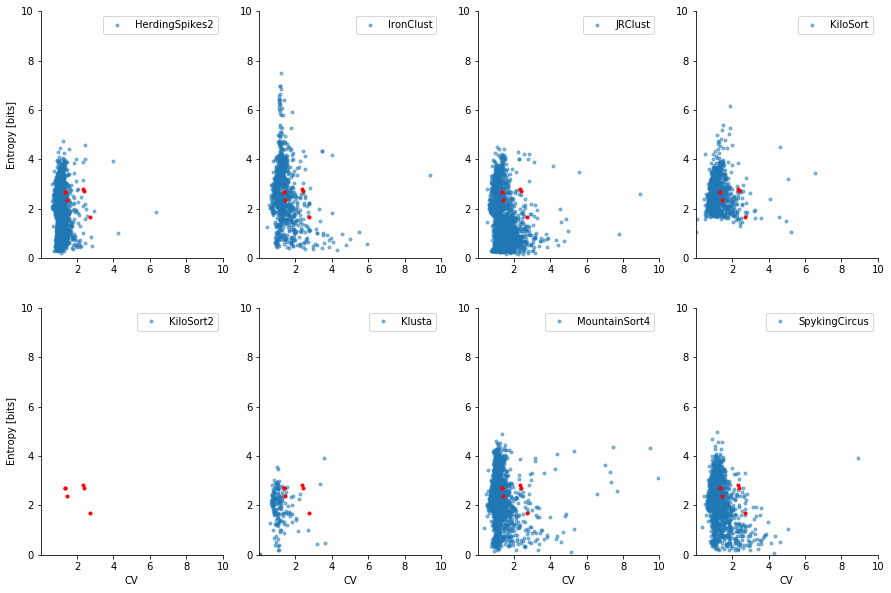

In [361]:
get_median = lambda isi: [np.median(isi[i]) for i in range(len(isi))]
get_cv = lambda isi: [np.std(isi[i])/np.mean(isi[i]) for i in range(len(isi))]

fr_gt = []; h_gt = []; isi_gt = []; cv_gt = []
for d in gt_features_c.keys():
    fr_gt.append(gt_features_c[d]['FR'])
    h_gt.append(gt_features_c[d]['H'])
    isi_gt.append(np.median(gt_features_c[d]['ISI']))
    cv_gt.append(np.std(gt_features_c[d]['ISI']) / np.mean(gt_features_c[d]['ISI']))    
b = 'pt'
toP = {k:[] for k in sorters}
toP2 = {k:[] for k in sorters}
for s in sorters:
    for rr in recs_names:
        toP[s].extend(np.asarray(output_sort_c[b][s][rr]))
        toP2[s].extend(np.asarray(get_cv(ISI_c[b][s][rr])))
bins = np.linspace(0,10,10)
ri = 1 # recording index
plt.figure(figsize=(15,10))
for n,s in enumerate(sorters):
    plt.subplot(2,4,n+1)
    plt.plot(toP2[s],toP[s], '.', label=s, alpha=0.5)
    plt.legend()
    sns.despine()
    plt.ylim(0,10); plt.xlim(0.001,1000)
#     if len(toP2[s])>0: plt.xscale('log')
    plt.plot(cv_gt,h_gt,'r.'); plt.xlim(0.01,10); plt.ylim(0,10)
    if n==0 or n==4: plt.ylabel('Entropy [bits]')
    if n>3: plt.xlabel('CV')    

In [375]:
HF_counts = {} #dictionary
bias = ['pt'] #list - better
binL = 0.3

for y in bias:
    temp_out = {k:{} for k in sorters}
    for k in sorters:
        temp_out[k] = {kk:[] for kk in recs_names}
    for x in range(len(sorting_results)):
        if sorting_results[x]['studyName']==ref_study:
            try:
                firings_path = ka.load_file(sorting_results[x]['firings'])
                sort_temp = sorting_results[x]['sorterName']
                rec_temp = sorting_results[x]['recordingName']
                sorting = se.MdaSortingExtractor(firings_path)
                for i in range(len(output_sort_c[y][sort_temp][rec_temp])):
                    nSpike = len(ISI_c[y][sort_temp][rec_temp][i])+1;
                    FR_spk = FR_c[y][sort_temp][rec_temp][i];
                    H_poiss = run_poisson_spkH_samples(FR_spk,binL,nSpike,10)                    
                    temp_out[sort_temp][rec_temp].append(output_sort_c[y][sort_temp][rec_temp][i]/H_poiss)                                        
            except:
                print('exception: iteration %s'%x)
    HF_counts[y] = temp_out

/Users/martyna/.local/lib/python3.7/site-packages/pyentropy/systems.py:574: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if (not np.issubdtype(X.dtype, np.int)) \
/Users/martyna/.local/lib/python3.7/site-packages/pyentropy/systems.py:575: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  or (not np.issubdtype(Y.dtype, np.int)):
/Users/martyna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


exception: iteration 4516
exception: iteration 4517
exception: iteration 4518
exception: iteration 4519
exception: iteration 4520
exception: iteration 4521
exception: iteration 4522
exception: iteration 4523
exception: iteration 4524
exception: iteration 4525
exception: iteration 4526
exception: iteration 4527
exception: iteration 4528
exception: iteration 4529
exception: iteration 4530
exception: iteration 4531
exception: iteration 4532
exception: iteration 4533
exception: iteration 4534
exception: iteration 4535
exception: iteration 4536
exception: iteration 4537
exception: iteration 4538
exception: iteration 4539
exception: iteration 4540


/Users/martyna/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/martyna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


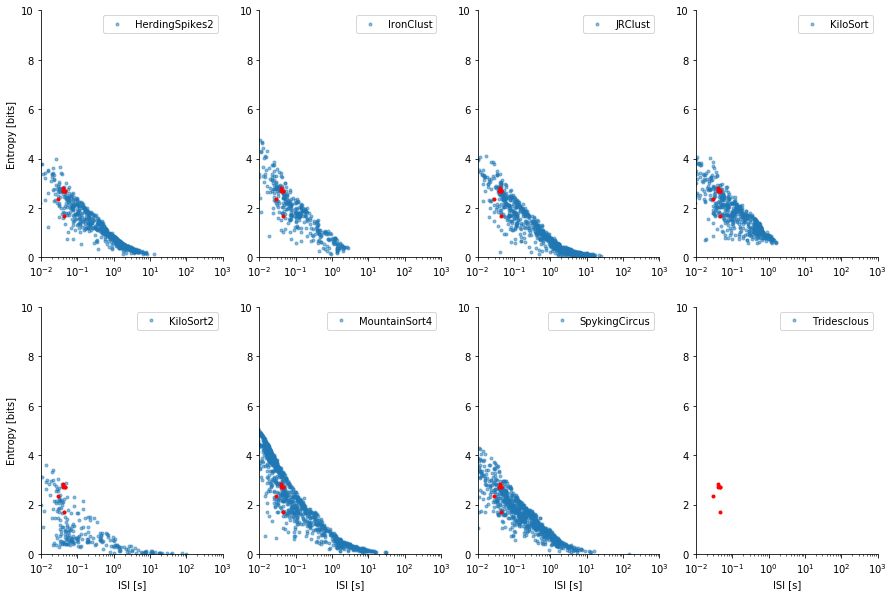

In [348]:
fr_gt = []; h_gt = []; isi_gt = []
for d in gt_features_c.keys():
    fr_gt.append(gt_features_c[d]['FR'])
    h_gt.append(gt_features_c[d]['H'])
    isi_gt.append(np.median(gt_features_c[d]['ISI']))
        
b = 'pt'
toP = {k:[] for k in sorters}
toP2 = {k:[] for k in sorters}
for s in sorters:
    for rr in recs_names:
        toP[s].extend(np.asarray(output_sort_c[b][s][rr]))
        toP2[s].extend(np.asarray(get_median(ISI_c[b][s][rr])))
bins = np.linspace(0,10,10)
ri = 1 # recording index
plt.figure(figsize=(15,10))
for n,s in enumerate(sorters):
    plt.subplot(2,4,n+1)
    plt.plot(toP2[s],toP[s], '.', label=s, alpha=0.5)
    plt.legend()
    sns.despine()
    plt.ylim(0,10); plt.xlim(0.001,1000)
    if len(toP2[s])>0: plt.xscale('log')
    plt.plot(isi_gt,h_gt,'r.'); plt.xscale('log'); plt.xlim(0.01,1000); plt.ylim(0,10)
    if n==0 or n==4: plt.ylabel('Entropy [bits]')
    if n>3: plt.xlabel('ISI [s]')
    

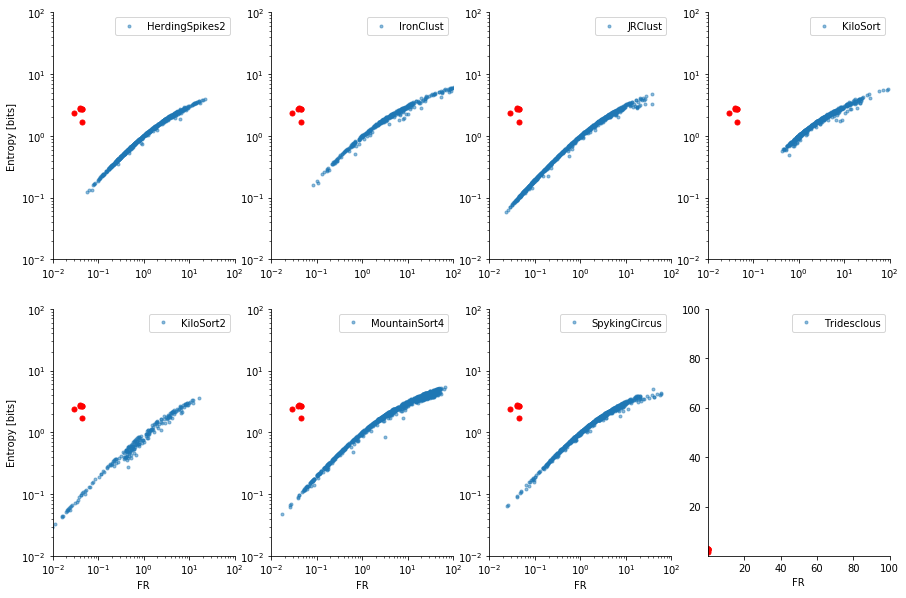

In [278]:
fr_gt = []; h_gt = []; isi_gt = []
for d in gt_features_c.keys():
    fr_gt.append(gt_features_c[d]['FR'])
    h_gt.append(gt_features_c[d]['H'])
    isi_gt.append(np.median(gt_features_c[d]['ISI']))
        
b = 'pt'
toP = {k:[] for k in sorters}
toP2 = {k:[] for k in sorters}
for s in sorters:
    for rr in recs_names:
        toP[s].extend(np.asarray(output_sort_c[b][s][rr]))
        toP2[s].extend(np.asarray(FR_c[b][s][rr]))
bins = np.linspace(0,10,10)
ri = 1 # recording index
plt.figure(figsize=(15,10))
for n,s in enumerate(sorters):
    plt.subplot(2,4,n+1)
    plt.plot(toP2[s],toP[s], '.', label=s, alpha=0.5)
    plt.legend()
    sns.despine()
    plt.ylim(0.01,100); plt.xlim(0.01,100)
    if len(toP2[s])>0: plt.xscale('log'); plt.yscale('log')
    plt.plot(isi_gt,h_gt,'r.',markersize=10)
   # plt.plot([0,100],[0,100], 'k--')
    if n==0 or n==4: plt.ylabel('Entropy [bits]')
    if n>3: plt.xlabel('FR')

/Users/martyna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/martyna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/martyna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/martyna/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/martyna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


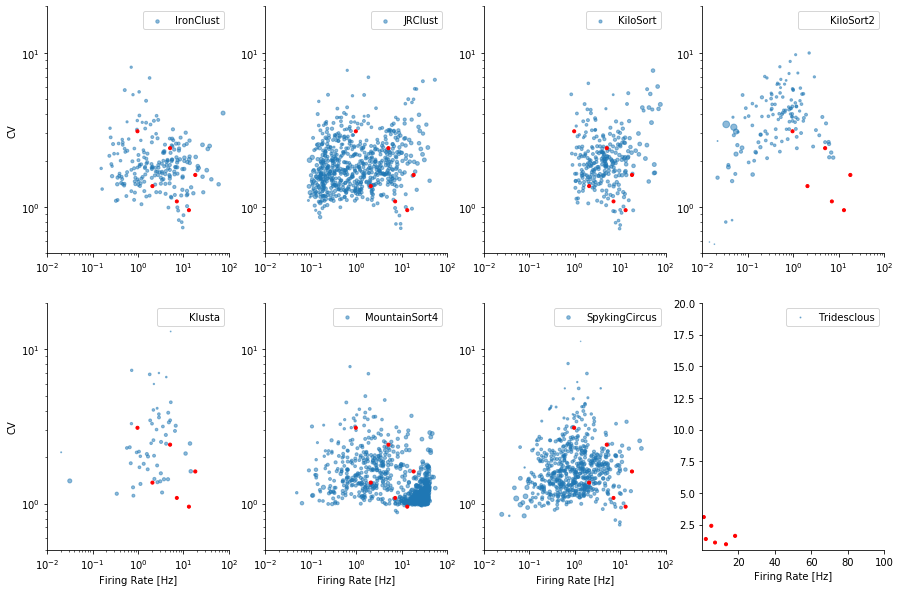

In [313]:
fr_gt = []; h_gt = []; isi_gt = []; hf_gt = []; cv_gt = []
for d in gt_features_c.keys():
    fr_gt.append(gt_features_c[d]['FR'])
    h_gt.append(gt_features_c[d]['H'])
    hf_gt.append(gt_features_c[d]['HF'])
    isi_gt.append(np.median(gt_features_c[d]['ISI']))
    cv_gt.append(np.std(gt_features_c[d]['ISI'])/np.mean(gt_features_c[d]['ISI']))
        
b = 'pt'
toP = {k:[] for k in sorters}
toP2 = {k:[] for k in sorters}
toP3 = {k:[] for k in sorters}
for s in sorters:
    for rr in recs_names:
        toP[s].extend(np.asarray(HF_counts[b][s][rr]))
        toP2[s].extend(np.asarray(FR_c[b][s][rr]))
        toP3[s].extend(get_cv(ISI_c[b][s][rr]))
bins = np.linspace(0,10,10)
ri = 1 # recording index
plt.figure(figsize=(15,10))
for n,s in enumerate(sorters):
    plt.subplot(2,4,n+1)
    plt.scatter(toP2[s],toP3[s], label=s, alpha=0.5, s=(3*np.array(toP[s]))**2)
    plt.legend()
    sns.despine()
    plt.ylim(0.5,20); plt.xlim(0.01,100)
    if len(toP3[s])>0: plt.xscale('log'); plt.yscale('log')
    plt.scatter(fr_gt,cv_gt,c='r',s=(3*np.array(hf_gt))**2)
    if n==0 or n==4: plt.ylabel('CV')
    if n>3: plt.xlabel('Firing Rate [Hz]')

/Users/martyna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/Users/martyna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/martyna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/martyna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/martyna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/martyna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/martyna/anaconda3

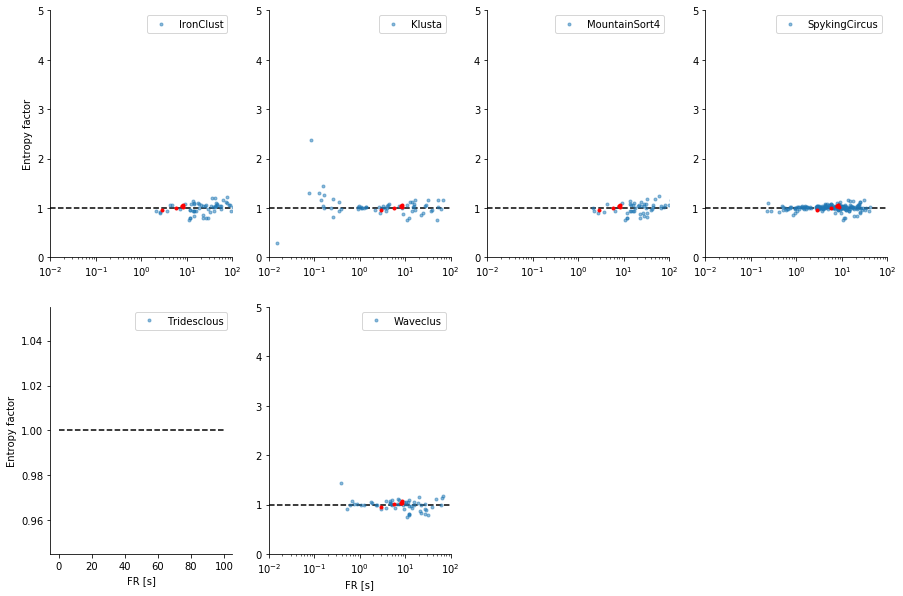

In [391]:
fr_gt = []; h_gt = []; isi_gt = []; hf_gt = [];
for d in gt_features_c.keys():
    fr_gt.append(gt_features_c[d]['FR'])
    h_gt.append(gt_features_c[d]['H'])
    isi_gt.append(np.median(gt_features_c[d]['ISI']))
    hf_gt.append(gt_features_c[d]['HF'])
        
binsLog = np.logspace(-2,2,15)
b = 'pt'
toP = {k:[] for k in sorters}
toP2 = {k:[] for k in sorters}
meanHF = {k:[] for k in sorters}
semHF = {k:[] for k in sorters}
for s in sorters:
    for rr in recs_names:
        toP[s].extend(np.asarray(HF_counts[b][s][rr]))
        toP2[s].extend(np.asarray(FR_c[b][s][rr]))
bins = np.linspace(0,10,10)
ri = 1 # recording index
plt.figure(figsize=(15,10))
for n,s in enumerate(sorters):
    plt.subplot(2,4,n+1)
    plt.plot(toP2[s],toP[s], '.', label=s, alpha=0.5)
    plt.legend()
    sns.despine()
    if len(toP2[s])>0: 
        plt.plot(fr_gt,hf_gt,'r.'); plt.xscale('log'); 
        plt.ylim(0,5); plt.xlim(0.01,100)
    if n==0 or n==4: plt.ylabel('Entropy factor')
    if n>3: plt.xlabel('FR [s]')
    for bi in range(len(binsLog)-1):
        temp = np.asarray(toP[s])[(toP2[s]>binsLog[bi]) & (toP2[s]<=binsLog[bi+1])]
        temp = temp[~np.isinf(temp)]
        meanHF[s].append(np.nanmean(temp))
        semHF[s].append(stats.sem(temp, nan_policy='omit'))
    meanHF[s] = np.asarray(meanHF[s])
    semHF[s] = np.asarray(semHF[s])
    plt.hlines(1,0.01,100,'k',linestyle='--')


Text(0, 0.5, 'HF [bits]')

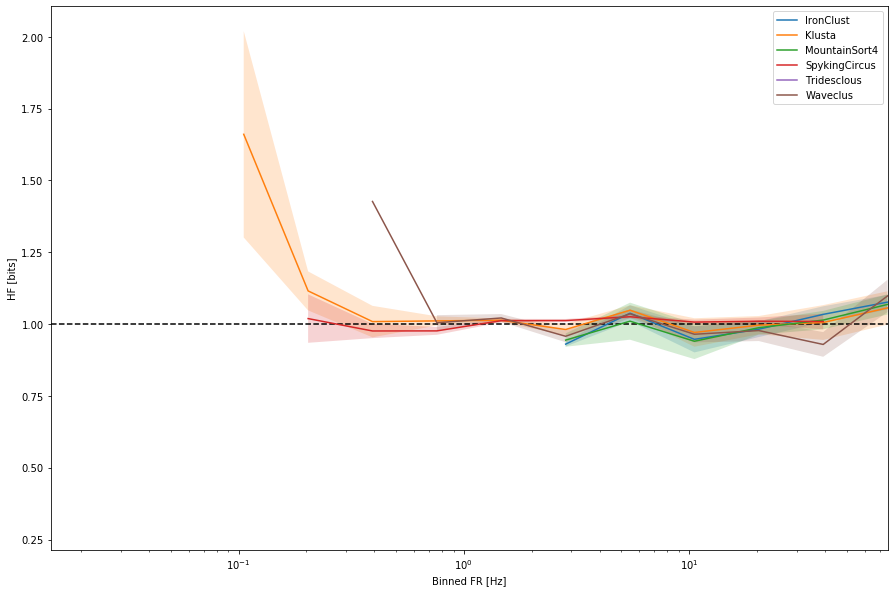

In [392]:
plt.figure(figsize=[15,10])
x2p = [(binsLog[i]+binsLog[i+1]) / 2 for i in range(len(binsLog)-1)]
for s in sorters:
    plt.plot(x2p, meanHF[s], label=s)
    plt.fill_between(x2p,meanHF[s]-semHF[s], meanHF[s]+semHF[s], alpha=.2)
plt.legend()
plt.xscale('log')
plt.hlines(1,x2p[0],x2p[-1],'k',linestyle='--')
plt.xlim(x2p[0], x2p[-1])
plt.xlabel('Binned FR [Hz]')
plt.ylabel('HF [bits]')

In [213]:
binsLog

array([1.00000000e-02, 6.30957344e-02, 3.98107171e-01, 2.51188643e+00,
       1.58489319e+01, 1.00000000e+02])

NameError: name 'get_median' is not defined

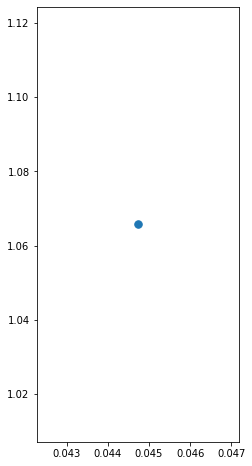

In [28]:
r = 'c26'
fig = plt.figure(figsize=(8,8))
plt.subplot(121); plt.plot(np.median(gt_features_c[d]['ISI']),gt_features_c[d]['H'],'.',markersize=15,label='gt')
for s in sorters:
    isi_ = get_median(ISI_c['pt'][s][r])
    try: plt.plot(isi_[best_unitid_kampff[r]],output_sort_c['pt'][s][r][best_unitid_kampff[r]],'.',markersize=10,label=s)
    except: continue 
plt.legend()
plt.ylabel('Entropy [bits]')
plt.xlabel('ISI [s]'); 
plt.xscale('log')

plt.subplot(122); plt.plot(gt_features_c[d]['FR'],gt_features_c[d]['H'],'.',markersize=18,label='gt')
for s in sorters:
    try: plt.plot(FR_c['pt'][s][r][best_unitid_kampff[r]],output_sort_c['pt'][s][r][best_unitid_kampff[r]],'.',markersize=12,label=s)
    except: continue 
plt.legend()
plt.xlabel('Firing Rate [Hz]'); 

/Users/martyna/.local/lib/python3.7/site-packages/pyentropy/systems.py:574: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if (not np.issubdtype(X.dtype, np.int)) \
/Users/martyna/.local/lib/python3.7/site-packages/pyentropy/systems.py:575: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  or (not np.issubdtype(Y.dtype, np.int)):


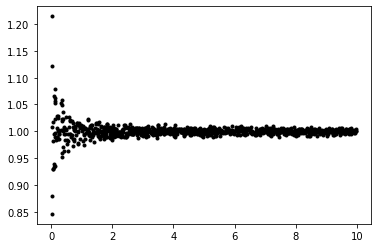

In [192]:
N = 1000
HF_poi = np.zeros(N)
fr2p = np.zeros(N)
nSpike = 10000
binL = 0.3
for i in range(N):
    frt = np.random.rand() * 10
    fr2p[i] = frt
    H_p = run_poisson_spkH_samples(frt,binL,nSpike,100)
    H_n = run_poisson_spkH_samples(frt,binL,nSpike,1)
    HF_poi[i] = H_n / H_p
plt.plot(fr2p, HF_poi, 'k.')